In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install openpyxl

## This week’s topic: Ukrainian exports

Soon after the invasion, a number of commentators pointed to Ukraine’s importance as an exporter of food products. If they cannot export food to the rest of the world, then it’ll obviously be an issue for Ukrainian farmers, and for their economy. But it might also lead to a food shortage for millions of people in other countries.

In response to this problem, a number of countries negotiated the [Black Sea Grain Initiative](https://en.wikipedia.org/wiki/Black_Sea_Grain_Initiative), aimed at helping Ukraine export food products across the Black Sea to Turkey, Mediterranean countries, and elsewhere. The program has been a success; as of earlier this month, more than 700 ships carrying food had left Ukraine.

This week, we’ll look at a data set describing the ships that have left Ukraine as part of this initiative.

### Data

The data set comes from [humdata.org](https://data.humdata.org/), which has a variety of humanitarian-related data sets. In particular, we’ll be looking at data from their page on the Black Sea Grain Initiative’s ship movements, at https://data.humdata.org/dataset/black-sea-grain-initiative-vessel-movements. I suggest downloading the data in Excel format, which includes a data dictionary on the “Readme” sheet, and the actual data we’ll use on the “Data” sheet.

The URL to download the data in Excel format is:

https://docs.google.com/spreadsheets/d/e/2PACX-1vRisnQjodySbp6-XXPGhdsVMp2stg_gyuxw42pP41tuxeic63IARau6bV1TgjLiw_ciAWsTO5LarPqT/pub?output=xlsx

### Tasks

Here is what I would like for you to do:
1. Read the Excel data into a data frame. Again, the “Data” sheet is what interests us.
2. Create a pivot table, showing how many tons of each commodity (rows) have left each port (columns).
3. Create a pivot table, showing how many tons of each commodity (columns) were going to each destination country (rows).
4. The worry was that lower-income countries would not have enough food to eat, because of the war. According to the data's "income group," what proportion of the grain are low-income countries receiving?
5. Have we seen growth in the total tonnage shipped each month to developing countries?
6. Finally, what 10 flags are most commonly used on the ships coming from Ukraine? Do any country's names appear more than once? If so, why, and how can you fix it?

The learning goals for this week are to work with pivot tables, calculate growth, and clean some weird data.

#### 1. Read the Excel data into a data frame. Again, the “Data” sheet is what interests us.


In [4]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRisnQjodySbp6-XXPGhdsVMp2stg_gyuxw42pP41tuxeic63IARau6bV1TgjLiw_ciAWsTO5LarPqT/pub?output=xlsx"

df = pd.read_excel(url, sheet_name="Data", parse_dates=['Departure'])

In [5]:
df.head()

,Status,Outbound Sequence,Vessel name,IMO,Departure port,Country,Commodity,Tonnage,Departure,Inspection İstanbul,Income group,Flag,World Bank region,UN region,Development category,WFP,Stranded
0,Outbound,1004,TQ SAMSUN,9125566,Odesa,The Netherlands,Rapeseed,15553.0,2023-07-16 04:00:00,2023-07-17 04:00:00,high-income,Türkiye,Europe & Central Asia,Western Europe and Others,developed,NaN,NaN
1,Outbound +,1004,TQ SAMSUN,9125566,Odesa,The Netherlands,Corn,23031.0,2023-07-16 04:00:00,2023-07-17 04:00:00,high-income,Türkiye,Europe & Central Asia,Western Europe and Others,developed,NaN,NaN
2,Outbound,1003,TK MAJESTIC,9072214,Odesa,Iraq,Corn,37867.0,2023-07-13 04:00:00,2023-07-15 04:00:00,upper-middle-income,St. Kitts and Nevis,Middle East & North Africa,Asia-Pacific,developing,NaN,NaN
3,Outbound,1002,MY LAMA,9339791,Odesa,Tunisia,Corn,27000.0,2023-07-08 04:00:00,2023-07-10 04:00:00,lower-middle income,Belize,Middle East & North Africa,Africa,developing,NaN,NaN
4,Outbound,1001,MINOAN FLAME,9147423,Chornomorsk,China,Corn,62447.0,2023-07-04 04:00:00,2023-07-07 04:00:00,upper-middle-income,Liberia,East Asia & Pacific,Asia-Pacific,developing,NaN,NaN


#### 2. Create a pivot table, showing how many tons of each commodity (rows) have left each port (columns).

By default, pivot tables calculate the mean of all values for that row-column intersection. So the result that we’ll get will show how much tonnage, on average, of each commodity was sent from each port. That might be useful, but it’s not what we’re asking for.

In [24]:
df.pivot_table(index="Commodity", columns="Departure port", values="Tonnage", aggfunc="sum")

Departure port,Chornomorsk,Odesa,Yuzhny/Pivdennyi
Commodity,,,
Barley,280891.00,618204.00,369203.36
Canola,113071.00,NaN,NaN
Corn,6565869.99,4700251.00,5632759.00
Mixed,2000.00,NaN,NaN
Peas,13820.00,NaN,59400.00
Rapeseed,493201.00,321053.00,186858.00
Rapeseed meal,5550.00,9600.00,NaN
Soya beans,206423.00,377688.00,218040.00
Soya oil,5170.00,NaN,NaN


By the way, it’s confusing that Pandas has both “pivot” and “pivot_table” methods. The “pivot” method doesn’t let you specify the aggregation function you want to use. So I tend to use “pivot_table” in my work.

#### 3. Create a pivot table, showing how many tons of each commodity (columns) were going to each destination country (rows).

In [25]:
df.pivot_table(
    index="Country", columns="Commodity", values="Tonnage", aggfunc="sum"
)

Commodity,Barley,Canola,Corn,Mixed,Peas,Rapeseed,Rapeseed meal,Soya beans,Soya oil,Sugar beet pellets,Sunflower meal,Sunflower oil,Sunflower pellets,Sunflower seed,Vegetable oil,Wheat,Wheat bran pellets
Country,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130869.0,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212220.0,NaN
Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1067242.0,NaN
Belgium,NaN,NaN,220483.00,NaN,NaN,265183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33000.0,NaN
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50335.00,9701.00,8800.0,NaN,NaN,NaN,NaN
China,340015.00,NaN,5781953.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1471908.00,370074.00,NaN,NaN,NaN,NaN,NaN
Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6200.00,NaN,NaN,NaN,541.0,NaN
Egypt,NaN,NaN,997998.00,NaN,NaN,NaN,NaN,131073.0,NaN,NaN,1503.00,3100.00,NaN,NaN,NaN,417849.0,NaN
Ethiopia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20008.00,NaN,NaN,NaN,262759.0,NaN


#### 4. The worry was that lower-income countries would not have enough food to eat, because of the war. According to the data's "income group," what proportion of the grain are low-income countries receiving?

In [29]:
df["Income group"].value_counts()

Income group
high-income            509
upper-middle-income    423
lower-middle income    183
low-income              29
Name: count, dtype: int64

In [31]:
df.groupby("Income group")["Tonnage"].sum()

Income group
high-income            14340210.40
low-income               822094.00
lower-middle income     5635962.91
upper-middle-income    12057768.69
Name: Tonnage, dtype: float64

In [34]:
df_tonnage_by_income_group = (
    df.groupby("Income group")["Tonnage"].sum() / df["Tonnage"].sum() * 100
)

df_tonnage_by_income_group.sort_values(ascending=False)

Income group
high-income            43.645589
upper-middle-income    36.698793
lower-middle income    17.153508
low-income              2.502110
Name: Tonnage, dtype: float64

In [38]:
df[df.Commodity == "Corn"].groupby("Income group")["Tonnage"].sum()

Income group
high-income            8277308.00
lower-middle income    1614904.00
upper-middle-income    7006667.99
Name: Tonnage, dtype: float64

In [39]:
df[df.Commodity == "Wheat"].groupby("Income group")["Tonnage"].sum()

Income group
high-income            3405377.0
low-income              802086.0
lower-middle income    3002912.0
upper-middle-income    1701255.0
Name: Tonnage, dtype: float64

#### 5. Have we seen growth in the total tonnage shipped each month to developing countries?

In [8]:
developing_only = df[df["Development category"] == "developing"]
developing_only

,Status,Outbound Sequence,Vessel name,IMO,Departure port,Country,Commodity,Tonnage,Departure,Inspection İstanbul,Income group,Flag,World Bank region,UN region,Development category,WFP,Stranded
2,Outbound,1003,TK MAJESTIC,9072214,Odesa,Iraq,Corn,37867.0,2023-07-13 04:00:00,2023-07-15 04:00:00,upper-middle-income,St. Kitts and Nevis,Middle East & North Africa,Asia-Pacific,developing,NaN,NaN
3,Outbound,1002,MY LAMA,9339791,Odesa,Tunisia,Corn,27000.0,2023-07-08 04:00:00,2023-07-10 04:00:00,lower-middle income,Belize,Middle East & North Africa,Africa,developing,NaN,NaN
4,Outbound,1001,MINOAN FLAME,9147423,Chornomorsk,China,Corn,62447.0,2023-07-04 04:00:00,2023-07-07 04:00:00,upper-middle-income,Liberia,East Asia & Pacific,Asia-Pacific,developing,NaN,NaN
6,Outbound,999,SANTY (WFP),9233985,Chornomorsk,Türkiye,Wheat,39998.0,2023-07-03 04:00:00,2023-07-09 04:00:00,upper-middle-income,NaN,Europe & Central Asia,Asia-Pacific,developing,WFP,NaN
7,Outbound,998,RUBY-T,9457878,Chornomorsk,Ethiopia,Sunflower oil,20008.0,2023-07-02 04:00:00,2023-07-06 04:00:00,low-income,Malta,Sub-Saharan Africa,Africa,developing,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,Outbound,6,STAR HELENA,9361213,Chornomorsk,China,Sunflower meal,45000.0,2022-08-07 04:00:00,2022-08-09 04:00:00,upper-middle-income,Marshall Islands,East Asia & Pacific,Asia-Pacific,developing,NaN,Stranded
1138,Outbound,5,GLORY,9288473,Chornomorsk,Iran,Corn,66084.0,2022-08-07 04:00:00,2022-08-09 04:00:00,lower-middle income,Marshall Islands,Middle East & North Africa,Asia-Pacific,developing,NaN,Stranded
1139,Outbound,4,POLARNET,9758961,Chornomorsk,Türkiye,Corn,12000.0,2022-08-05 04:00:00,2022-08-07 04:00:00,upper-middle-income,Türkiye,Europe & Central Asia,Asia-Pacific,developing,NaN,Stranded
1142,Outbound,1,RAZONI,9086526,Odesa,Türkiye,Corn,1527.0,2022-08-01 04:00:00,2022-08-03 04:00:00,upper-middle-income,Sierra Leone,Europe & Central Asia,Asia-Pacific,developing,NaN,Stranded


In [9]:
developing_only.groupby(pd.Grouper(key="Departure", freq="M"))["Tonnage"].sum()

Departure
2022-08-31     803007.99
2022-09-30    1674627.61
2022-10-31    2200305.00
2022-11-30    1410245.00
2022-12-31    2276494.00
2023-01-31    1915458.00
2023-02-28    1894388.00
2023-03-31    2515402.00
2023-04-30    1785037.00
2023-05-31     879864.00
2023-06-30    1259059.00
2023-07-31     230320.00
Freq: M, Name: Tonnage, dtype: float64

<Axes: xlabel='Departure'>

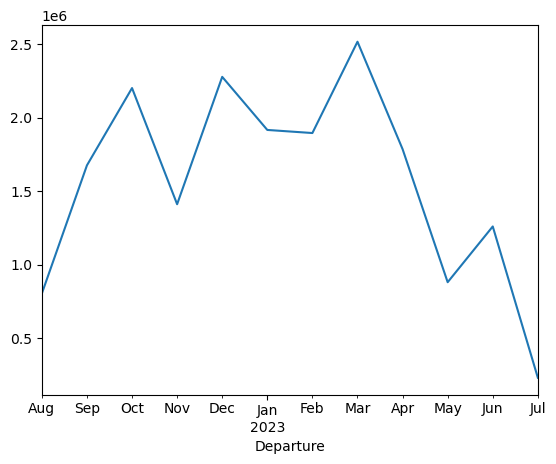

In [10]:
developing_only.groupby(pd.Grouper(key="Departure", freq="M"))["Tonnage"].sum().plot()

In [11]:
developing_only.groupby(pd.Grouper(key="Departure", freq="M"))[
    "Tonnage"
].sum().pct_change() * 100

Departure
2022-08-31           NaN
2022-09-30    108.544327
2022-10-31     31.390704
2022-11-30    -35.906840
2022-12-31     61.425426
2023-01-31    -15.859299
2023-02-28     -1.099998
2023-03-31     32.781774
2023-04-30    -29.035717
2023-05-31    -50.708921
2023-06-30     43.097001
2023-07-31    -81.706973
Freq: M, Name: Tonnage, dtype: float64

In [12]:
developing_only.groupby([df["Departure"].dt.year, df["Departure"].dt.month])[
    "Tonnage"
].sum().pct_change() * 100

Departure  Departure
2022       8                   NaN
           9            108.544327
           10            31.390704
           11           -35.906840
           12            61.425426
2023       1            -15.859299
           2             -1.099998
           3             32.781774
           4            -29.035717
           5            -50.708921
           6             43.097001
           7            -81.706973
Name: Tonnage, dtype: float64

/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

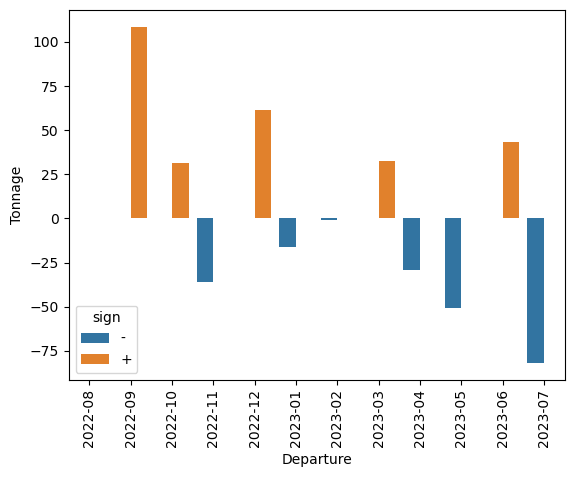

In [13]:
df_sub = (
    (
        developing_only.groupby(pd.Grouper(key="Departure", freq="M"))["Tonnage"]
        .sum()
        .pct_change()
        * 100
    )
    .to_frame()
    .reset_index()
)
df_sub["sign"] = np.where(df_sub["Tonnage"] > 0, "+", "-")
df_sub["Departure"] = df_sub["Departure"].dt.strftime("%Y-%m")

sns.barplot(data=df_sub, x="Departure", y="Tonnage", hue="sign")
# rotate x-axis labels
plt.xticks(rotation=90)
None

#### 6. Finally, what 10 flags are most commonly used on the ships coming from Ukraine? Do any country's names appear more than once? If so, why, and how can you fix it?

In [14]:
df.Flag

0                   Türkiye
1                   Türkiye
2       St. Kitts and Nevis
3                    Belize
4                   Liberia
               ...         
1139                Türkiye
1140                  Malta
1141                 Panama
1142           Sierra Leone
1143           Sierra Leone
Name: Flag, Length: 1144, dtype: object

In [20]:
df.Flag.value_counts().head(10)

Flag
Liberia             215
Panama              210
Marshall Islands    161
Malta               118
Barbados             80
Palau                45
Türkiye              39
Belize               36
Comoros              33
Bahamas              20
Name: count, dtype: int64

The most common flag? Liberia, followed by Panama and the Marshall Islands. You could maybe, sorta, kinda understand why Panama (which bridges two oceans) might make sense. But Liberia and the Marshall Islands? According to the Wikipedia article on “flags of convenience,” more than 40 percent of the world’s ships are registered to those three countries. And since the 1960s, Liberia has had more ship registrations than the UK.

In [27]:
df[df.Flag.str.contains("Marshall", na=False)].Flag.value_counts()

Flag
Marshall Islands    161
Name: count, dtype: int64